In [22]:
# load pep30 sequences and translate dna to protein to determine peptide length

from Bio.Seq import Seq

# input count file
count_file='Pep30.counts.txt'

# output file
count_with_pep='Pep30-translated.txt'
outf = open(count_with_pep,'w')

seqs = []

with open(count_file,'r') as f:
    n=0
    for line in f:
        n=n+1
        print(n,'\r',end='')
        flds = line.strip().split()
        seqs.append(flds[0].upper())
        # translate, continue after stop codon
        pep = Seq(flds[0]).translate()
        # get the first pep len
        pepLen = len(pep.split('*')[0])
        outf.write(flds[0]+'\t'+str(pep)+'\t'+str(pepLen)+'\t'+flds[1]+'\t'+flds[2]+'\t'+flds[3]+'\t'+flds[4]+'\n')
outf.close()       


In [23]:
# how different are the sequences from each other

import numpy as np

# hamming distance
def dist(seq1,seq2):
    d= 0 
    for i in range(len(seq1)):
        if seq1[i] != seq2[i]:
            d=d+1
    return d

def min_dist(seq,seqs):
    # min distance to non-self sequences
    min_d = len(seq)
    for s in seqs:
        if s != seq:
            d = dist(seq,s)
            if d < min_d:
                min_d = d
    return min_d

min_ds = []
n=0

import os

if os.path.exists('Pep30.min_dist.npy'):
    min_ds = np.load('Pep30.min_dist.npy')
else:
    for seq in seqs:
        n=n+1
        print(n,'\r',end='')
        min_ds.append(min_dist(seq,seqs))
    np.save("Pep30.min_dist", min_ds)



In [24]:
# shuffle sequences
seqs2 = []
import random
for seq in seqs:
    a=list(seq)
    random.shuffle(a)
    seqs2.append(''.join(a))

min_ds2 = []
n=0

if os.path.exists('Pep30.min_dist2.npy'):
    min_ds2 = np.load('Pep30.min_dist2.npy')
else:
    for seq in seqs2:
        n=n+1
        print(n,'\r',end='')
        min_ds2.append(min_dist(seq,seqs2))
    np.save("Pep30.min_dist2", min_ds2)

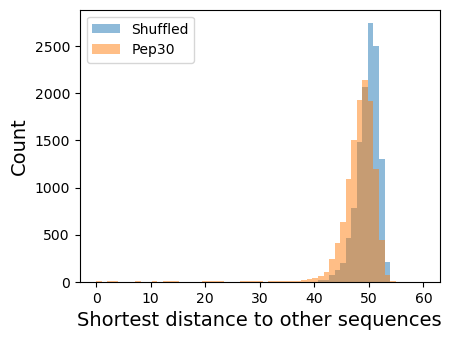

[48.0, 50.0]

In [39]:
from matplotlib import pylab
pylab.figure(figsize=(6,4))
bins = np.linspace(0, 60, 60)
pylab.hist(min_ds2, bins=bins, alpha=0.5, label="Shuffled")
pylab.hist(min_ds,  bins=bins, alpha=0.5, label="Pep30")
pylab.xlabel("Shortest distance to other sequences", size=14)
pylab.ylabel("Count", size=14)
#pylab.title("Multiple Histograms with Matplotlib")
pylab.legend(loc='upper left')
pylab.subplots_adjust(bottom=0.2,left=0.2,right=0.8)
pylab.savefig("Pep30-diversity.pdf")
pylab.show()
[np.median(min_ds),np.median(min_ds2)]